In [1]:
import pandas as pd
import numpy as np
from datareader import all_df_reader, LEMAS_reader

In [2]:
all_df = all_df_reader("DATA/BH.pkl")

In [3]:
all_df.dtypes

SEGMENT LEVEL                                                                           object
NUMERIC STATE CODE                                                                     float64
ORI                                                                                     object
DATE ORI WAS ADDED                                                                      object
DATE ORI WENT NIBRS                                                                     object
CITY NAME                                                                               object
STATE ABBREVIATION                                                                      object
POPULATION GROUP                                                                        object
COUNTRY DIVISION                                                                       float64
COUNTRY REGION                                                                          object
AGENCY INDICATOR                                  

In [2]:
from simnet.similarity import CosineSimilarity, MatchNumberSimilarity, SimilarityNetwork
import networkx as nx

In [3]:
cs1 = CosineSimilarity(0.5)
ms1 = MatchNumberSimilarity(2)

In [39]:
sn = SimilarityNetwork(
    all_df.query("year == 1991"),
    ms1,
    "ORI",
    ["UCR COUNTY CODE 1", "POPULATION GROUP","NUMBER OF MONTHS REPORTED"]
    # ["STATE ABBREVIATION", "CURRENT POPULATION 1", "NUMBER OF MONTHS REPORTED"]
)


In [40]:
sn.fit_transform()

<18013x18013 sparse matrix of type '<class 'numpy.bool_'>'
	with 1147421 stored elements in Compressed Sparse Row format>

In [41]:
nx.community.louvain_communities(sn.network)

[{'ALAST0000',
  'ARASP0000',
  'AZCCHPX00',
  'COCBI0000',
  'COCSP0000',
  'COCSPNO00',
  'FLFHP0000',
  'GA0251200',
  'GAGBI0100',
  'GAGBI0300',
  'GAGBI0400',
  'GAGBI0500',
  'GAGBI0600',
  'GAGBI0700',
  'GAGBI0800',
  'GAGBI1100',
  'GAGSP0000',
  'IADPS0000',
  'IDDLE0400',
  'IDIBN0100',
  'IDIBN0200',
  'IDIBN0300',
  'IDIBN0400',
  'IDIBN0500',
  'IDIBN0600',
  'IDISP0000',
  'IDISP0100',
  'IDISP0200',
  'IDISP0300',
  'IDISP0400',
  'IDISP0500',
  'IDISP0600',
  'KSKHP0000',
  'MNMHP0000',
  'MOMHP0000',
  'MSMHP0000',
  'MTMHP0000',
  'NBNSP0000',
  'NCBCI0000',
  'NCNHP0000',
  'NDNHP0000',
  'NV0139900',
  'OHOHP0000',
  'OKOHP0000',
  'PA0160000',
  'SCSHP0000',
  'SDDMP0000',
  'TNTHP0000',
  'TX0000000',
  'UTUHP0000',
  'VA010S100',
  'VA040S100',
  'VA081S200',
  'VA087S100',
  'VA0970200',
  'VA101SP00',
  'VA102SP00',
  'VA104SP00',
  'VA106SP00',
  'VA107SP00',
  'VA109SP00',
  'VA110SP00',
  'VA112SP00',
  'VA115SP00',
  'VA118SP00',
  'VA121SP00',
  'VA124SP

In [49]:
sn2 = SimilarityNetwork(
    all_df.query("year == 1991"),
    cs1,
    "ORI",
    ["UCR COUNTY CODE 1", "POPULATION GROUP", "NUMBER OF MONTHS REPORTED"]
    # ["STATE ABBREVIATION", "CURRENT POPULATION 1", "NUMBER OF MONTHS REPORTED"]
)
sn2.fit_transform()
sn2.adjacency_matrix

<18013x18013 sparse matrix of type '<class 'numpy.bool_'>'
	with 56796247 stored elements in Compressed Sparse Row format>

In [20]:
match_sn = MatchNumberSimilarity(1)
match_sn = CosineSimilarity(0.5, [0, 0, 1])
data = np.array([
    [1, True, False, True],
    [2, False, True, False],
    [3, True, True, False],
    [4,False, False, True]
])  # Replace this with your actual data

# Extract the boolean columns from the data
bool_data = data[:, 1:]

match_sn.find_similarity_matrix(bool_data)

array([[ True, False, False,  True],
       [False, False, False, False],
       [False, False, False, False],
       [ True, False, False,  True]])

In [18]:
match_sn.similarity_matrix

array([[1.        , 0.        , 0.70710678, 0.        ],
       [0.        , 1.        , 0.70710678, 0.        ],
       [0.70710678, 0.70710678, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

# Construct Similarity Network from 2018 Census


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from simnet.similarity import MatchNumberSimilarity, CosineSimilarity, SimilarityNetwork

In [2]:
census_file = "RAW_DATA/PD Census/2018/DS0001/38771-0001-Data.tsv"
census_df = pd.read_csv(census_file, delimiter='\t')

census_df

,AGENCYNAME,AGENCYID,CITY,STATE,ZIP,COUNTY,ORI9,ORI7,AGENCYSAMPTYPE,COLLAPSEDSAMPTYPE,...,LAWENF_MULTI_LIM,NONLAWENF_MULTI_SWN,NONLAWENF_MULTI_LIM,TOT_SWN_FUNCTION,TOT_LIM_FUNCTION,SUBMISSIONMODE,POPULATION,BUDGETEDIT,FTS_SROEDIT,FTLIM_SROEDIT
0,PUYALLUP POLICE DEPARTMENT,632102,PUYALLUP,WA,98371,PIERCE,WA0270100,WA02701,3,3,...,0,0,0,58,13,1,41886,0,0,0
1,PUYALLUP TRIBAL POLICE DEPARTMENT,632105,TACOMA,WA,98404,PIERCE,WADI06200,WADI062,91,90,...,0,0,0,26,14,1,-8,0,0,0
2,MAVERICK COUNTY CONSTABLE PRECINCT 1,652855,EAGLE PASS,TX,78852,MAVERICK,TX1620200,TX16202,7,7,...,-9,-9,-9,-9,-9,-9,-8,0,0,0
3,MAVERICK COUNTY CONSTABLE PRECINCT 2,652856,EAGLE PASS,TX,78852,MAVERICK,TX1620300,TX16203,7,7,...,-9,-9,-9,-9,-9,-9,-8,0,0,0
4,NEZ PERCE COUNTY SHERIFF'S OFFICE,638372,LEWISTON,ID,83501,NEZ PERCE,ID0350000,ID03500,1,1,...,-8,0,-8,53,-8,1,40408,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17716,OHIO CASINO CONTROL COMMISSION,436417,COLUMBUS,OH,43215,FRANKLIN,,,654,650,...,-9,-9,-9,-9,-9,1,-8,0,0,0
17717,NEVADA STATE CONTRACTOR'S BOARD INVESTIGATIONS,434964,HENDERSON,NV,89074,CLARK,,,659,650,...,-9,-9,-9,-9,-9,3,-8,0,0,0
17718,UTAH STATE DEPARTMENT OF COMMERCE,421528,SALT LAKE CITY,UT,84114,SALT LAKE,,,659,650,...,-9,-9,-9,-9,-9,-9,-8,0,0,0
17719,CALIFORNIA EMERGENCY MANAGEMENT AGENCY,291692,MATHER,CA,95655,SACRAMENTO,,,699,699,...,-9,-9,-9,-9,-9,-9,-8,0,0,0


In [3]:
matching_columns_data = ( pd.read_csv("RAW_DATA/PD Census/2018 Census Column.csv")
                    .query("include == 1") )
matching_columns = matching_columns_data["Column Code"]

dtype_map = {
    't': str,
    'c': 'category',
    'b': bool,
    'n': np.float64
}
astype_dict = dict(zip(matching_columns_data["Column Code"], matching_columns_data["dtype"].map(dtype_map)))

In [4]:
df = census_df[matching_columns].astype(astype_dict).replace(-9, np.NAN).replace(-8, np.NAN)
df

,AGENCYNAME,COUNTY,ORI7,AGENCYSAMPTYPE,TRIBALFLAG,COMPLETE,AGENCY_OPERATOR,OPBUDGET,OPBUDGET_EST,PAT_RESP_ROUTINE,...,OTHERAREA_SWN,OTHERAREA_LIM,LAWENF_MULTI_SWN,LAWENF_MULTI_LIM,NONLAWENF_MULTI_SWN,NONLAWENF_MULTI_LIM,TOT_SWN_FUNCTION,TOT_LIM_FUNCTION,SUBMISSIONMODE,POPULATION
0,PUYALLUP POLICE DEPARTMENT,PIERCE,WA02701,3,False,True,4.0,18033000.0,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,58.0,13.0,1,41886.0
1,PUYALLUP TRIBAL POLICE DEPARTMENT,PIERCE,WADI062,91,True,True,5.0,10580350.0,False,True,...,0.0,8.0,26.0,0.0,0.0,0.0,26.0,14.0,1,NaN
2,MAVERICK COUNTY CONSTABLE PRECINCT 1,MAVERICK,TX16202,7,False,False,NaN,NaN,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MAVERICK COUNTY CONSTABLE PRECINCT 2,MAVERICK,TX16203,7,False,False,NaN,NaN,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NEZ PERCE COUNTY SHERIFF'S OFFICE,NEZ PERCE,ID03500,1,False,True,2.0,6200000.0,True,True,...,0.0,NaN,0.0,NaN,0.0,NaN,53.0,NaN,1,40408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17716,OHIO CASINO CONTROL COMMISSION,FRANKLIN,,654,False,False,1.0,0.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
17717,NEVADA STATE CONTRACTOR'S BOARD INVESTIGATIONS,CLARK,,659,False,False,NaN,NaN,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
17718,UTAH STATE DEPARTMENT OF COMMERCE,SALT LAKE,,659,False,False,NaN,NaN,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17719,CALIFORNIA EMERGENCY MANAGEMENT AGENCY,SACRAMENTO,,699,False,False,NaN,NaN,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


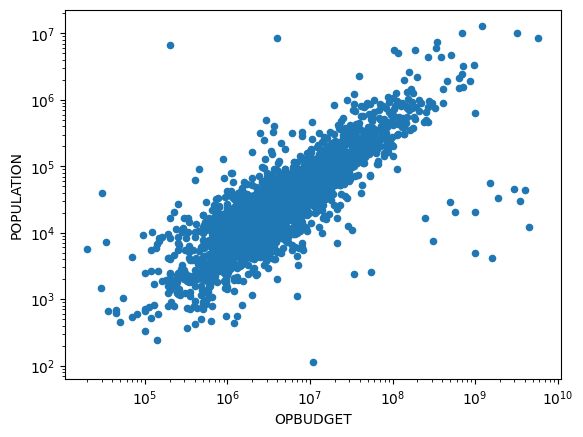

In [10]:
ax = df.dropna().assign().plot(x = "OPBUDGET", y = "POPULATION", kind='scatter')
ax.set_yscale('log'); ax.set_xscale('log')

In [11]:
df.loc[:,'PAT_RESP_ROUTINE':'SPEC_OTH'].sum()

PAT_RESP_ROUTINE     17721
PAT_RESP_CIT_INIT    17721
PAT_RESP_CRIM_INC    17721
PAT_RESP_CRIM_ARR    17721
PAT_RESP_SPEC_EVT    17721
PAT_RESP_DISPATCH    17721
CRIM_HOMICIDE        17721
CRIM_CYBER           17721
CRIM_ARSON           17721
TRAF_ENFORCE         17721
TRAF_DIRECT          17721
TRAF_ACC_INV         17721
TRAF_PARK            17721
TRAF_COMMERCIAL      17721
DET_TRANSP           17721
DET_BOOK             17721
DET_TEMP_CELL        17721
DET_TEMP_FAC         17721
DET_JAIL             17721
COURT_SEC            17721
COURT_SERVE          17721
COURT_WARRANT        17721
COURT_EVICT          17721
COURT_PROT_ORDER     17721
COURT_CHILD_SPRT     17721
COURT_APPR_FUG       17721
FOR_CSI              17721
FOR_DIGITAL          17721
FOR_LAB              17721
SPEC_ANIMAL          17721
SPEC_SCL_CROSS       17721
SPEC_EMS             17721
SPEC_EM_MGMT         17721
SPEC_FIRE            17721
TASK_GANG            17721
TASK_DRUG_TRAF       17721
TASK_OPIOID          17721
T

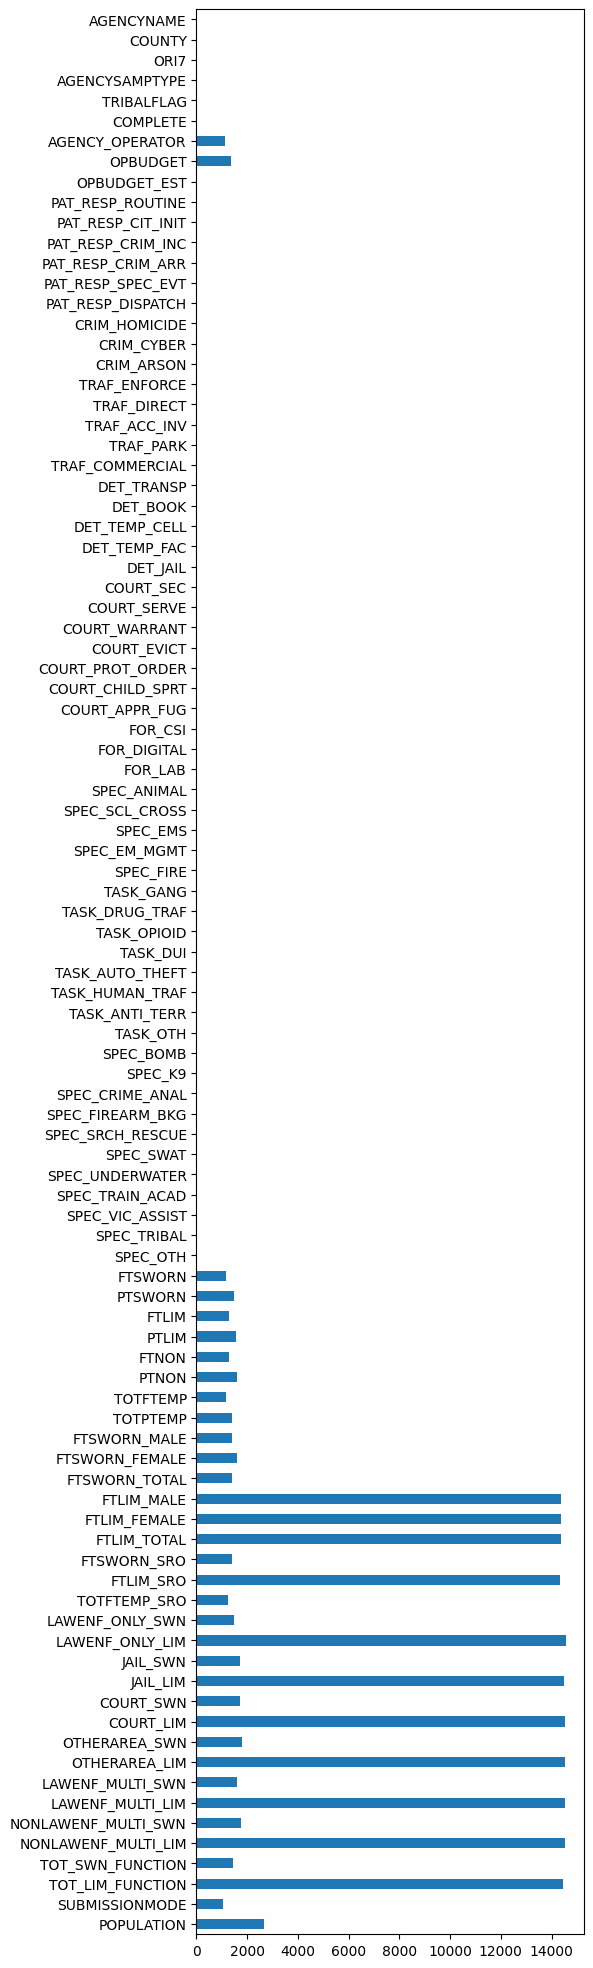

In [27]:
fig, ax = plt.subplots(1,1, figsize = (5, 25))
df.isna().sum().plot(kind='barh', ax=ax)
ax.invert_yaxis()

# Construct Similarity from LEMAS Data

In [1]:
from datareader import LEMAS_reader
import datareader.cleaner.lemas as lc
from functools import partial
import pandas as pd
import numpy as np

lemas_path = "RAW_DATA/LEMAS/2016/DS0001/37323-0001-Data.tsv"
lemas_df = LEMAS_reader(lemas_path)

In [9]:
len(lemas_df.columns)

434

array([[<Axes: title={'center': 'na_count'}>]], dtype=object)

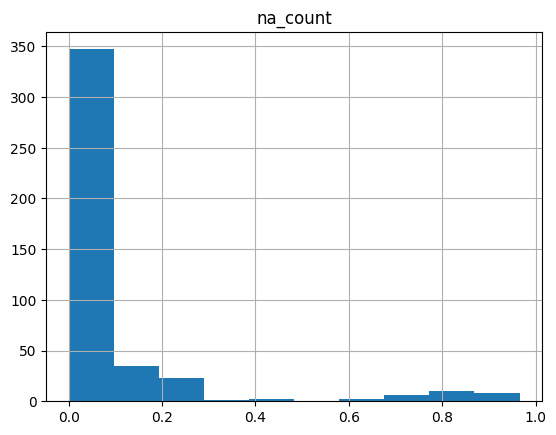

In [2]:
NROW = len(lemas_df)

na_counts = (lemas_df.pipe(lc.negative_to_na)
         .pipe(lc.count_na_each_col)
         .reset_index().set_axis(["col", "na_count"], axis=1)
         .sort_values(by="na_count")
         .assign(na_count = lambda r: r.na_count/NROW)
         .pipe(lc.merge_col_info_with_col_type(lemas_df.dtypes))
        )
na_counts.hist()

In [3]:
cat_col, con_col = lc.get_cat_conti_columns_list(lemas_df)

In [4]:
print( len(cat_col), len(con_col))

272 149


## Column Names for those that has high NA rates (>0.3)

In [3]:
most_na = na_counts.query("na_count>0.3")
most_na

,col,na_count,dtype
162,PERS_COLBAR_NON,0.355603,int64
166,OPER_DIS_EST,0.406609,int64
164,OPER_CFS_EST,0.457256,int64
56,OPBUDGET_EST,0.643319,int64
63,ASSETFOR_EST,0.649425,int64
308,TECH_WEB_NONE,0.723420,int64
205,CP_SURV_CRPROB,0.759698,int64
206,CP_SURV_RESOURCE,0.760417,int64
207,CP_SURV_PERFORM,0.760417,int64
208,CP_SURV_TRAINING,0.760417,int64


## In case -8 and -9 should be separated

<Axes: xlabel='neg_8', ylabel='neg_9'>

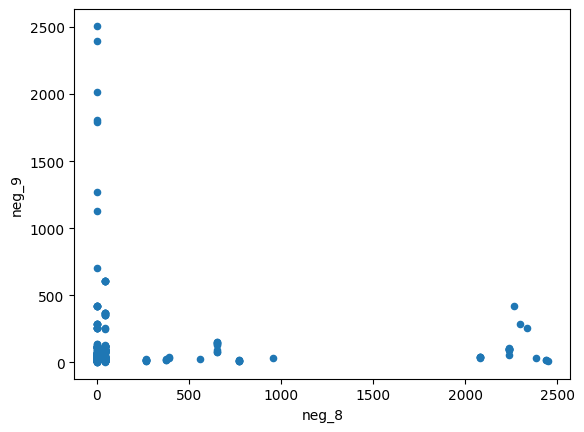

In [4]:
lc.count_89_and_empty(lemas_df).query("neg_8 + neg_9>0").plot(x="neg_8", y="neg_9", kind='scatter')

### Try deleting helper columns such as flags and specifying strings

In [6]:
len(without_flag_sp.columns)

415

<Axes: xlabel='neg_8', ylabel='neg_9'>

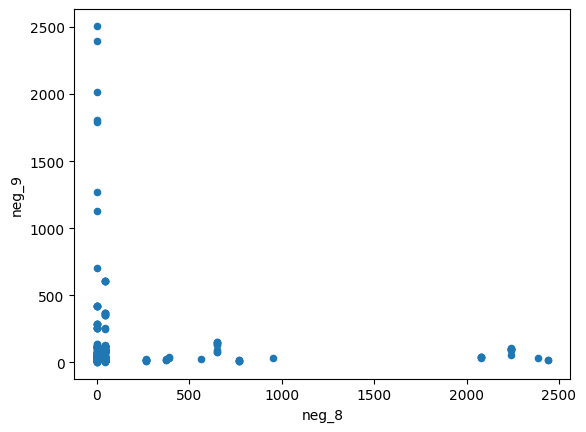

In [5]:
without_flag_sp = ( lemas_df
                   .pipe(lc.remove_specify_name)
                   .pipe(lc.remove_flags)
                )
cols_89_count = lc.count_89_and_empty(without_flag_sp)

lc.plot_89(cols_89_count.query("neg_8 + neg_9>0"))


### Who are those with high -8 rate?

In [6]:
cols_89_count.query("neg_8/@NROW<0.3 and neg_9/@NROW<0.3")


,col,neg_8,neg_9,empty_str,dtype
0,LEAR_ID,0,0,0,int64
1,AGENCYNAME,0,0,0,object
2,CITY,0,0,0,object
3,ZIPCODE,0,0,0,int64
4,STATE,0,0,0,object
...,...,...,...,...,...
410,ISSU_ADDR_VIC,0,32,0,int64
411,FINALWGT,0,0,0,float64
412,NEW_TOT_HIRES,0,141,0,int64
413,NEW_TOT_SEP,0,141,0,int64


As it turns out, code `-8` or `-88` does not necessarily mean missing value. 

For example, in the question: *During the fiscal year including June 30, 2016, what proportion of agency personnel received at least eight hours of community policing training (e.g., problem solving, SARA, or community partnerships)?*, it mentioned in the question, that *If a personnel category does not exist in your agency, mark 'N/A'.*

Specifically, scenarios like "skip to question xx if no" exist, and the subsequent follow-up questions will then be makred as `-8`.

This means that the NA code (not the missing value code `-9`) actually makes a great indicator.

# Imputing for Missing Data

1. For continuous variables, imputing can simply use mean in its strata
1. If boolean or categorical, get its mode by strata

In [7]:
lemas_df_no89 = (lemas_df
                 .pipe(lc.remove_flags).pipe(lc.remove_specify_name)
                 .pipe(lc.remove_col_with_many_89)) # default keeping -8

In [8]:
len(lemas_df_no89.columns)

408

In [8]:
mode_by_strata = lemas_df_no89.groupby('STRATA').agg(lambda x: pd.Series.mode(x)[0] if pd.Series.mode(x).count() > 0 else None)
mean_by_strata = lemas_df_no89.groupby('STRATA').mean()
mode_all = lemas_df_no89.agg(lambda x: pd.Series.mode(x)[0] if pd.Series.mode(x).count() > 0 else None)
mean_all = lemas_df_no89.mean()

/var/folders/jn/cpxfd61d5q51pz8dtwjztd0m0000gn/T/ipykernel_1432/2314095025.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_by_strata = lemas_df_no89.groupby('STRATA').mean()
/var/folders/jn/cpxfd61d5q51pz8dtwjztd0m0000gn/T/ipykernel_1432/2314095025.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_all = lemas_df_no89.mean()


In [85]:
mean_by_strata

,LEAR_ID,ZIPCODE,POPSERVED,POPGROUP,AGENCYTYPE,FTSAUTH,FTSWORN,EDIT_FTSWORN,FTLIM,FTNON,...,ISSU_ADDR_REPOFF,ISSU_ADDR_RESRCH,ISSU_ADDR_SCH,ISSU_ADDR_SWAT,ISSU_ADDR_TERROR,ISSU_ADDR_VIC,FINALWGT,NEW_TOT_HIRES,NEW_TOT_SEP,FINALWGT_NTH_NTS
STRATA,,,,,,,,,,,,,,,,,,,,,
101,639825.973404,49934.645390,2.065490e+05,4.367021,1.0,477.315603,453.540780,0.005319,2.787234,134.601064,...,2.491135,1.929078,1.712766,1.624113,2.109929,2.069149,1.131206,31.230496,26.179078,1.183673
102,639642.777778,46963.175926,3.868746e+04,5.990741,1.0,71.953704,68.546296,0.000000,0.546296,18.944444,...,3.000000,2.546296,1.898148,1.981481,2.638889,2.638889,7.185185,5.287037,3.212963,7.533981
103,640959.573276,41024.909483,1.938128e+04,6.879310,1.0,35.633621,35.168103,0.004310,0.241379,8.870690,...,2.982759,2.818966,2.038793,2.431034,3.150862,2.866379,6.913793,2.659483,1.956897,7.225225
104,641004.973799,44914.578603,7.601087e+03,7.842795,1.0,15.163755,14.615721,0.008734,0.076419,3.290393,...,2.997817,2.844978,2.585153,3.237991,3.423581,3.056769,6.978166,1.259825,0.783843,7.347126
105,639662.199005,45342.838308,2.879303e+03,8.529851,1.0,5.835821,5.532338,0.014925,0.079602,0.701493,...,3.039801,2.962687,3.037313,3.694030,3.721393,3.042289,7.304746,0.669154,0.276119,7.607534
106,639002.070423,51190.739437,1.336458e+03,8.926056,1.0,2.387324,2.313380,0.031690,0.059859,0.221831,...,2.838028,2.915493,2.915493,3.739437,3.683099,2.961268,8.134048,0.172535,-0.066901,8.587620
107,630005.344828,54325.160920,1.091092e+03,8.965517,1.0,1.195402,1.264368,0.068966,0.080460,0.137931,...,2.735632,3.022989,3.206897,3.632184,3.678161,2.873563,9.199751,-0.321839,-0.402299,9.881215
201,639406.221402,51184.564576,4.725938e+05,3.273063,2.0,365.206642,314.734317,0.003690,95.066421,230.693727,...,2.686347,2.254613,1.664207,1.693727,2.239852,2.136531,1.321033,28.538745,32.715867,1.415020
202,640500.204082,52030.122449,1.097296e+05,4.775510,2.0,63.653061,58.551020,0.000000,25.653061,45.346939,...,3.183673,3.081633,2.387755,2.183673,3.102041,2.836735,7.408163,8.285714,6.653061,7.408163


In [6]:
cat_allowed_values = {1, 2, 3, 4, 5, 6, 7, 8, -8, -88, -9}

# Initialize lists to store information
cat_col_names = []
# Iterate through columns
for col in lemas_df_no89.columns:
    # Check if all values in the column are in the allowed set
    if set(lemas_df_no89[col].unique()).issubset(cat_allowed_values):
        cat_col_names.append(col)

continuous_col_names = set(mean_by_strata.columns) - set(cat_col_names)

In [7]:
st_list = []

for st in lemas_df_no89["STRATA"].unique():
    strata_mask = lemas_df_no89["STRATA"] == st
    sdf = lemas_df_no89[strata_mask].copy()    # strata df
    for col in cat_col_names:
        sdf.loc[:,col] = sdf[col].replace(-9, sdf[col].mode()[0]).replace(-9, mode_all[col])
    for col in continuous_col_names:
        to_inpute = np.mean(np.multiply(sdf[col], sdf[col]>0))
        sdf.loc[:,col] = sdf[col].replace(-8, 0).replace(-9, to_inpute)
    
    st_list.append(sdf)

imputed_lemas = pd.concat(st_list)

In [ ]:
# def impute_missing_values(row):
#     strata = row['STRATA']

#     for col in cat_col_names:
#         if row[col] == -9:
#             row[col] = mode_by_strata.loc[strata, col]

#     for col in continuous_col_names:
#         if row[col] == -9:
#             row[col] = mean_by_strata.loc[strata, col]

#     return row

# lemas_df_no89_copy = lemas_df_no89.apply(impute_missing_values, axis=1)

In [36]:
imputed_lemas.sort_index().to_csv("Imputed_Lemas.csv")

# Similarity on Imputed LEMAS Data

In [4]:
import pandas as pd
import numpy as np
import networkx as nx
from datareader.cleaner import lemas as lc

First find those with higher variance (whether before or after dummy transformation), 
discard those that are all too similar

In [53]:
from simnet.similarity import CosineSimilarity, SimilarityNetwork

imputed_lemas = pd.read_csv("Imputed_Lemas.csv")
cat_col_names, continuous_col_names = lc.get_cat_conti_columns_list(imputed_lemas)

In [56]:
len(cat_col_names)

260

In [7]:
lc.get_column_names_from_range_tuples(list(imputed_lemas.columns), [("FTSWORN","FTNON"), ("PERS_NEW_WHT" ,"PERS_SEP_TOTS")])

['FTSWORN',
 'EDIT_FTSWORN',
 'FTLIM',
 'FTNON',
 'PERS_BILING_SWN',
 'PERS_BILING_LIM',
 'PERS_BILING_NON']

Try filtering out those with low variety (for categorical variable) and low variance (for continuous variable).

Entropy measure is used.

(array([41., 28., 21., 54., 53., 15., 17., 12.,  7., 11.]),
 array([0.01164794, 0.16606803, 0.32048812, 0.47490821, 0.6293283 ,
        0.78374839, 0.93816847, 1.09258856, 1.24700865, 1.40142874,
        1.55584883]),
 <BarContainer object of 10 artists>)

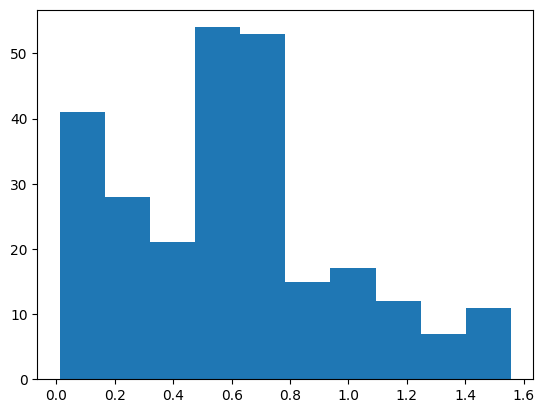

In [41]:
import matplotlib.pyplot as plt
from simnet.variety import get_discrete_variety_score, get_conti_variety_score

# # For categorical var:
variety_threshold = 0.4
cat_col_variety_full = {col: v
                   for col in cat_col_names if (v:=get_discrete_variety_score(imputed_lemas[col]))}# > variety_threshold
                    # }
                    #  > variety_threshold}
plt.hist(cat_col_variety_full.values())

Add threshold to the variables

(array([42., 25.,  8., 10., 11., 10.,  6.,  6.,  4.,  7.]),
 array([0.59413002, 0.6903019 , 0.78647378, 0.88264567, 0.97881755,
        1.07498943, 1.17116131, 1.26733319, 1.36350507, 1.45967695,
        1.55584883]),
 <BarContainer object of 10 artists>)

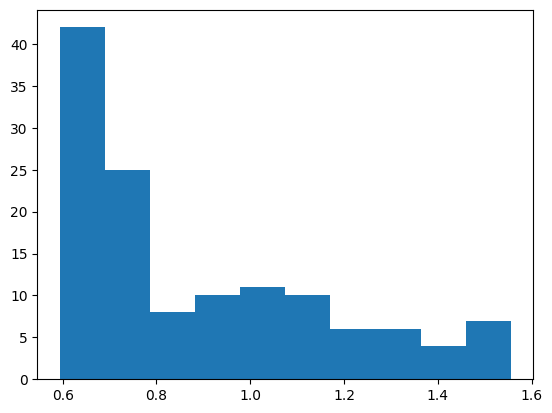

In [42]:
variety_p75 = np.percentile(list(cat_col_variety_full.values()), 50)
cat_col_variety = {col:v for col, v in cat_col_variety_full.items() if v > variety_p75}
plt.hist(cat_col_variety.values())

In [43]:
## can use entropy
len(cat_col_variety)

129

In [44]:
from simnet.variety import log_normalize

full_time_employee_columns = lc.get_column_names_from_range_tuples(
    list(imputed_lemas.columns),
    list(pd.read_csv("CodeBook/full_time_personnel_cols.csv")[["start_col_name", "end_col_name"]].itertuples(index=False, name=None))
)
# set category type
df = imputed_lemas.astype({col:'category' for col in cat_col_names}).assign(
    log_pop = lambda x: log_normalize(x['POPSERVED']), log_budget = lambda x: log_normalize(x['OPBUDGET'])
).pipe(
    lc.transform_to_proportion(full_time_employee_columns, 'TOTFTEMP')
)

In [52]:
df

,Unnamed: 0,LEAR_ID,AGENCYNAME,CITY,ZIPCODE,STATE,COUNTY,FIPS,ORI9,POPSERVED,...,ISSU_ADDR_SCH,ISSU_ADDR_SWAT,ISSU_ADDR_TERROR,ISSU_ADDR_VIC,FINALWGT,NEW_TOT_HIRES,NEW_TOT_SEP,FINALWGT_NTH_NTS,log_pop,log_budget
0,0,635592,DAVIS POLICE DEPARTMENT,DAVIS,95618,CA,YOLO,6113,CA0570100,68111,...,3,2,3,2,7.185185,5.703704,3.629630,7.533981,0.660713,0.783248
1,1,645110,WEST NEW YORK POLICE,WEST NEW YORK,7093,NJ,HUDSON,34017,NJ0091200,53343,...,3,2,2,3,1.131206,31.629433,26.578014,1.183673,0.546056,0.674355
2,2,631270,WESTOVER POLICE DEPARTMENT,WESTOVER,26501,WV,MONONGALIA,54061,WV0310400,4243,...,5,5,5,5,7.304746,1.027363,0.634328,7.607534,-0.641567,-0.694089
3,3,631316,BARABOO POLICE DEPARTMENT,BARABOO,53913,WI,SAUK,55111,WI0570200,12173,...,1,2,3,3,6.913793,3.047414,2.344828,7.225225,-0.147114,-0.001664
4,4,631684,OREGON POLICE DEPARTMENT,OREGON,53575,WI,DANE,55025,WI0137400,3334,...,2,5,5,3,6.978166,1.711790,1.235808,7.347126,-0.754676,-0.207605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,2779,645361,LAS VEGAS METRO POLICE DEPARTMENT,LAS VEGAS,89106,NV,CLARK,32003,NV0020100,1592178,...,4,1,1,2,1.131206,354.000000,216.000000,1.183673,2.139320,2.334349
2780,2780,635749,LOS ANGELES COUNTY SHERIFF'S DEPARTMENT,MONTEREY PARK,91754,CA,LOS ANGELES,6037,CA0190000,10137915,...,2,1,1,2,1.321033,460.000000,1694.000000,1.415020,3.007789,3.131008
2781,2781,638583,CHICAGO POLICE DEPARTMENT,CHICAGO,60653,IL,COOK,17031,ILCPD0000,2704958,...,2,1,1,2,1.131206,595.000000,506.000000,1.183673,2.387959,2.763773
2782,2782,635751,LOS ANGELES POLICE DEPARTMENT,LOS ANGELES,90012,CA,,6037,CA0194200,3976322,...,2,1,1,2,1.131206,760.000000,716.000000,1.183673,2.568706,2.782484


In [51]:
has_na = df[df.isnull().any(axis=1)]
has_na


,Unnamed: 0,LEAR_ID,AGENCYNAME,CITY,ZIPCODE,STATE,COUNTY,FIPS,ORI9,POPSERVED,...,ISSU_ADDR_SCH,ISSU_ADDR_SWAT,ISSU_ADDR_TERROR,ISSU_ADDR_VIC,FINALWGT,NEW_TOT_HIRES,NEW_TOT_SEP,FINALWGT_NTH_NTS,log_pop,log_budget
38,38,648333,OTISVILLE POLICE DEPARTMENT,OTISVILLE,48463,MI,GENESEE,26049,MI2564000,827,...,3,5,5,3,7.304746,1.027363,0.634328,7.607534,-1.408720,-1.633768
92,92,633410,WALWORTH COUNTY SHERIFF'S OFFICE,SELBY,57472,SD,,46129,SD0640000,5610,...,2,4,3,2,9.125000,0.666667,0.708333,10.950000,-0.510545,-1.012625
149,149,429065,MOORELAND POLICE DEPARTMENT,MOORELAND,47360,IN,HENRY,,IN0330500,362,...,2,5,5,2,9.199751,0.000000,0.000000,9.881215,-1.796307,-2.586258
206,206,631529,IRON RIDGE POLICE DEPARTMENT,IRON RIDGE,53035,WI,DODGE,55027,WI0141400,898,...,3,4,4,3,8.134048,0.000000,0.000000,8.587620,-1.370079,-1.642097
220,220,631887,WIND POINT POLICE DEPARTMENT,RACINE,53402,WI,RACINE,,wi0521600,1709,...,5,5,5,5,7.304746,0.000000,0.000000,7.607534,-1.068188,-1.410810
240,240,632950,ETHRIDGE POLICE DEPARTMENT,ETHRIDGE,38456,TN,LAWRENCE,47099,TN0500700,480,...,4,5,5,3,8.134048,0.000000,0.000000,8.587620,-1.663942,-1.654678
276,276,634216,ELK LICK TOWNSHIP POLICE DEPARTMENT,WEST SALISBURY,15565,PA,SOMERSET,42111,PA0562500,2148,...,3,3,3,3,8.134048,0.000000,0.000000,8.587620,-0.960928,-1.944431
278,278,634255,FOSTER TOWNSHIP POLICE DEPARTMENT,POTTSVILLE,17901,PA,SCHUYLKILL,42083,PA0545700,3423,...,3,4,3,3,7.304746,0.000000,0.000000,7.607534,-0.742317,-1.745745
290,290,634507,MAIN TOWNSHIP POLICE DEPARTMENT,BLOOMSBURG,17815,PA,COLUMBIA,42037,PA0192200,1284,...,3,3,3,3,9.199751,0.000000,0.000000,9.881215,-1.202329,-1.998093
301,301,634708,OTTOELDRED REGIONAL POLICE DEPARTMENT,ELDRED,16731,PA,,,PA0420700,3312,...,3,4,4,4,8.134048,0.000000,0.000000,8.587620,-0.757782,-1.878561


In [39]:
[len(l) for l in lc.get_cat_conti_columns_list(df)]

[260, 144]

In [46]:
sm_on_high_variety = SimilarityNetwork(
    df,
    CosineSimilarity(0.8),
    "ORI9",
    list(cat_col_variety.keys()) + full_time_employee_columns + ["log_pop", "log_budget"]
)

In [47]:
sm_on_high_variety.fit_transform()

ValueError: Input contains NaN.

In [23]:
sm_on_high_variety.adjacency_matrix.nnz

1580

In [93]:
node_df = pd.read_csv("DATA/fbi_nibrs_participation_data.csv")[[
    "state_abbr","agency_name","unit_name","population","ori" ,"longitude","latitude"
]].rename(columns={"ori":"ORI9"})
node_df

,state_abbr,agency_name,unit_name,population,ORI9,longitude,latitude
0,AK,anchorage,NaN,286388,AK0010100,-149.284329,61.174250
1,AK,fairbanks,NaN,30832,AK0010200,-146.601909,64.691501
2,AK,juneau,NaN,31925,AK0010300,-134.178445,58.372910
3,AK,ketchikan,NaN,8307,AK0010400,-131.106685,55.449938
4,AK,kodiak,NaN,5778,AK0010500,-153.630606,57.553159
...,...,...,...,...,...,...,...
17113,WY,weston,NaN,2485,WY0230000,-104.570020,43.846213
17114,WY,newcastle,NaN,3383,WY0230100,-104.570020,43.846213
17115,WY,upton,NaN,1052,WY0230200,-104.570020,43.846213
17116,WY,wind river agency,NaN,0,WYDI05000,-108.605531,43.055303


In [173]:
sm_on_high_variety.export(".","first_test", node_df)

## Node distribution
- Columns with >0.3 missing value removed
- Only on categorical variables
- Imputed with mode
- Cosine similarity with threshold = 0.7

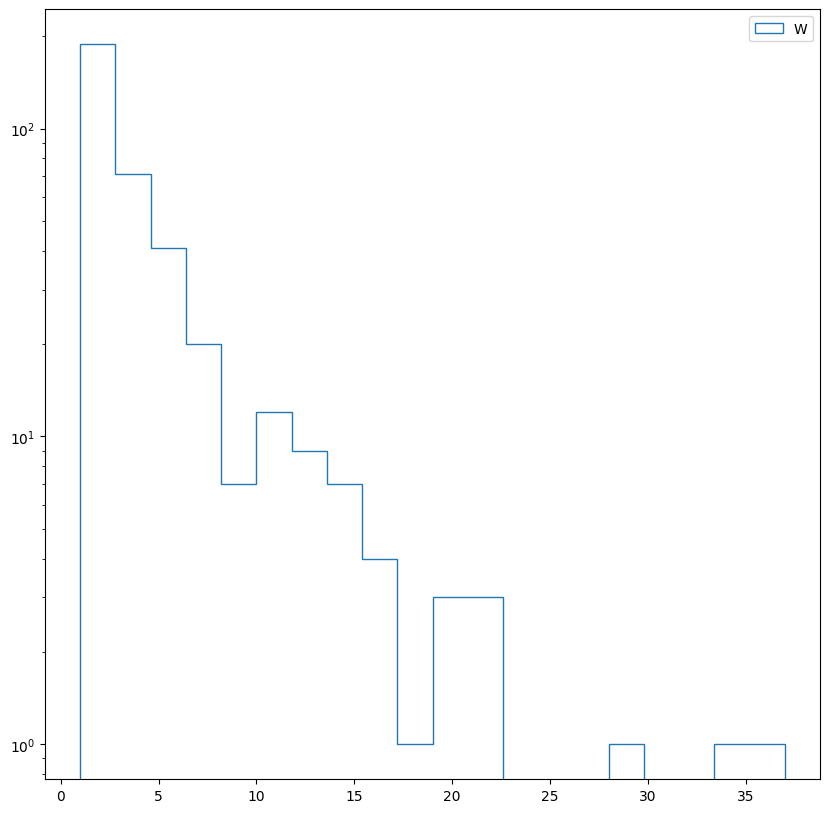

In [24]:
def plot_degree_dist(G, ax, **kwargs):
    import seaborn as sns
    if isinstance(G, nx.Graph):
        degrees = [G.degree(n) for n in G.nodes() if G.degree(n)>0]
    else:
        degrees = [n for n in G if n > 0]
    ax.hist(degrees, bins=20, histtype='step', **kwargs)

fig_dig_dis, ax_deg_dist = plt.subplots(1,1, figsize=(10,10))
plot_degree_dist(sm_on_high_variety.network, ax_deg_dist, label = "W")
ax_deg_dist.set_yscale('log');ax_deg_dist.legend()

In [ ]:
sm_on_high_variety_08 = SimilarityNetwork(
    df,
    CosineSimilarity(0.8),
    "ORI9",
    cat_col_names + {"log_pop", "log_budget"}
)
sm_on_high_variety_08.fit_transform()


### Trying different threshold and entropy quantile

In [82]:
edge_num_by_th_q: list[dict[str, float]] = []
for q in range(20,100,5):
    for th in range(50,100,5):
        variety_q = np.percentile(list(cat_col_variety_full.values()), q)
        cat_col_variety = {col:v for col, v in cat_col_variety_full.items() if v >= variety_q}

        sn = SimilarityNetwork(
            df,
            CosineSimilarity(th/100.0),
            "ORI9",
            list(cat_col_variety.keys()) +  ["log_pop", "log_budget"] 
        )
        sn.fit_transform()

        edge_num_by_th_q.append(
            {
                'q': q/100.0,
                'th': th/100.0,
                'edge_num':np.log10(sn.adjacency_matrix.nnz)
            }
        )


In [83]:
dd = pd.DataFrame(edge_num_by_th_q)

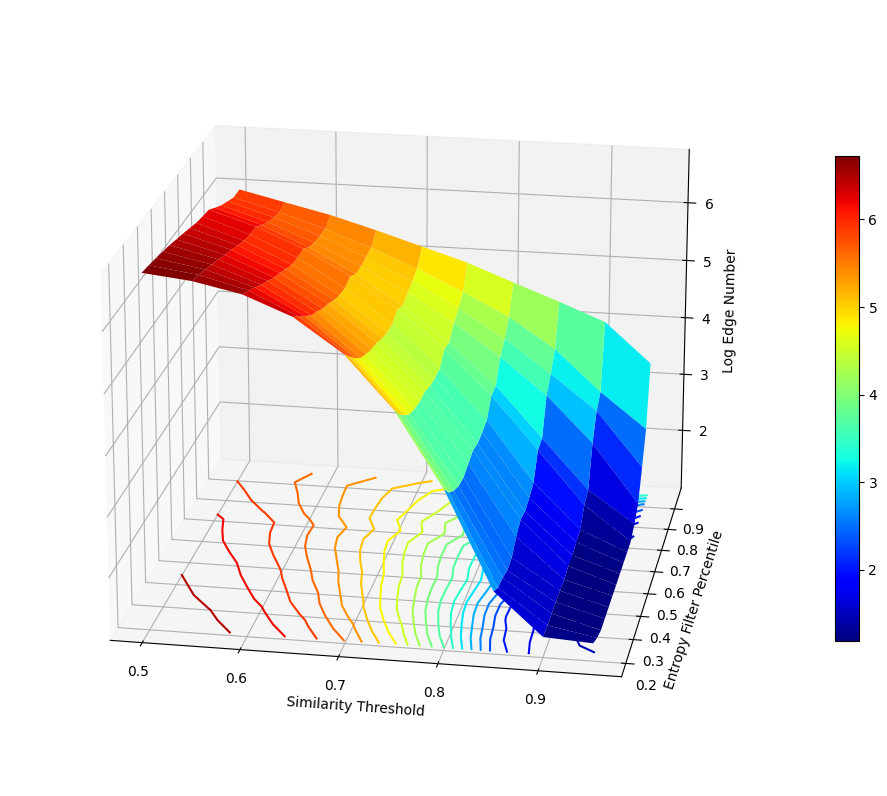

In [90]:
mesh = dd.pivot(index = 'th', columns='q', values='edge_num')
x,y = np.meshgrid(mesh.index, mesh.columns)
z = mesh.to_numpy().T

fig= plt.figure(figsize=(10,10))
ax: plt.Axes = fig.add_subplot(projection='3d')
my_cmap = plt.get_cmap('jet')
surf = ax.plot_surface(x,y,z, cmap = my_cmap)
ax.contour(x,y,z, zdir = 'z', offset=1, cmap = my_cmap, levels = 20)
ax.set_xlabel("Similarity Threshold"); ax.set_ylabel("Entropy Filter Percentile");
ax.set_zlabel("Log Edge Number")
ax.view_init(elev=20, azim=-80, vertical_axis='z')
fig.colorbar(surf, shrink = 0.5)
fig.tight_layout()

### When pick Q = 75, see the node distribution

/var/folders/jn/cpxfd61d5q51pz8dtwjztd0m0000gn/T/ipykernel_1236/2088368157.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_dig_dis.show()


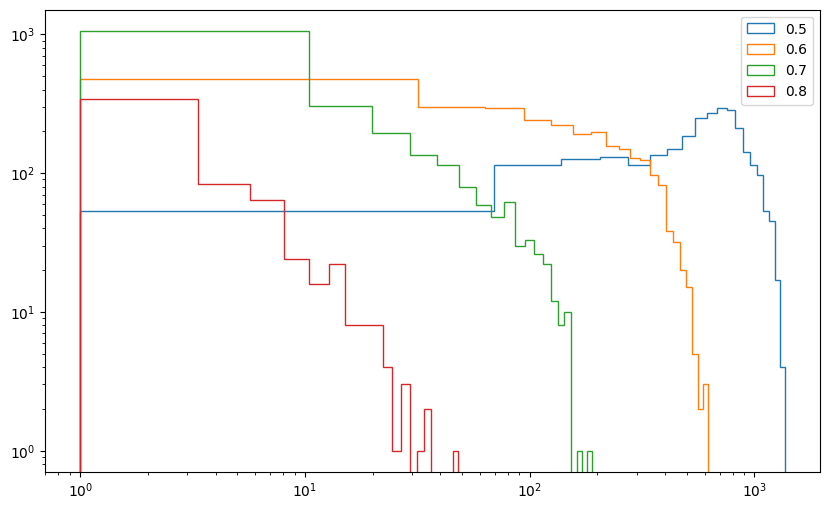

In [91]:
# log 0.5 0.6 0.7 0.8
variety_q = np.percentile(list(cat_col_variety_full.values()), 75)
cat_col_variety_75 = {col:v for col, v in cat_col_variety_full.items() if v >= variety_q}

fig_dig_dis, ax_deg_dist = plt.subplots(1,1, figsize=(10,6))

for th in range(5, 9):
    sn = SimilarityNetwork(
        df,
        CosineSimilarity(th/10.0),
        "ORI9",
        list(cat_col_variety_75) + ["log_pop", "log_budget"]
    )
    sn.fit_transform()
    plot_degree_dist(sn.degree, ax_deg_dist, label = f"{th/10.0}");
ax_deg_dist.set_yscale('log');ax_deg_dist.set_xscale('log');
ax_deg_dist.legend()
fig_dig_dis.show()

In [94]:
## Use 0.8
sn = SimilarityNetwork(
    df,
    CosineSimilarity(0.8),
    'ORI9',
    list(cat_col_variety_75) + ["log_pop", "log_budget"]
)
sn.fit_transform()
# sn.export(".","th_8_q_75", node_df)

<2784x2784 sparse matrix of type '<class 'numpy.float64'>'
	with 2880 stored elements in Compressed Sparse Row format>